# Case Study #1 - Danny's Diner

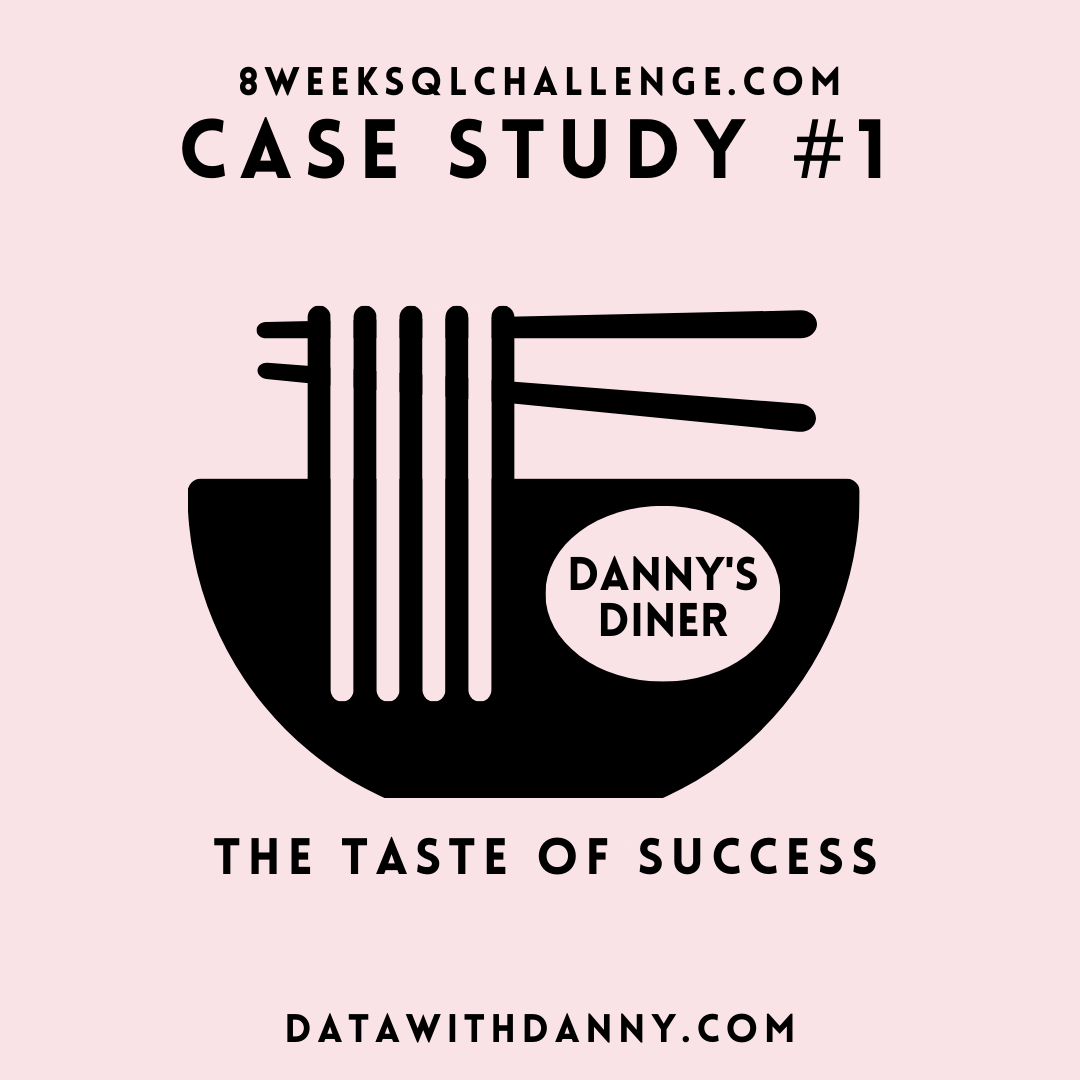

---

## Introduction 
Danny seriously loves Japanese food so in the beginning of 2021, he decides to embark upon a risky venture and opens up a cute little restaurant that sells his 3 favourite foods: sushi, curry and ramen.

Danny’s Diner is in need of your assistance to help the restaurant stay afloat - the restaurant has captured some very basic data from their few months of operation but have no idea how to use their data to help them run the business.

---

## Problem Statement

Danny wants to use the data to answer a few simple questions about his customers, especially about their visiting patterns, how much money they’ve spent and also which menu items are their favourite. Having this deeper connection with his customers will help him deliver a better and more personalised experience for his loyal customers.

He plans on using these insights to help him decide whether he should expand the existing customer loyalty program - additionally he needs help to generate some basic datasets so his team can easily inspect the data without needing to use SQL.

Danny has provided you with a sample of his overall customer data due to privacy issues - but he hopes that these examples are enough for you to write fully functioning SQL queries to help him answer his questions!

Danny has shared with you 3 key datasets for this case study:

- `sales`
- `menu`
- `members`

You can inspect the entity relationship diagram and example data below.

---

## Entity Relationship Diagram

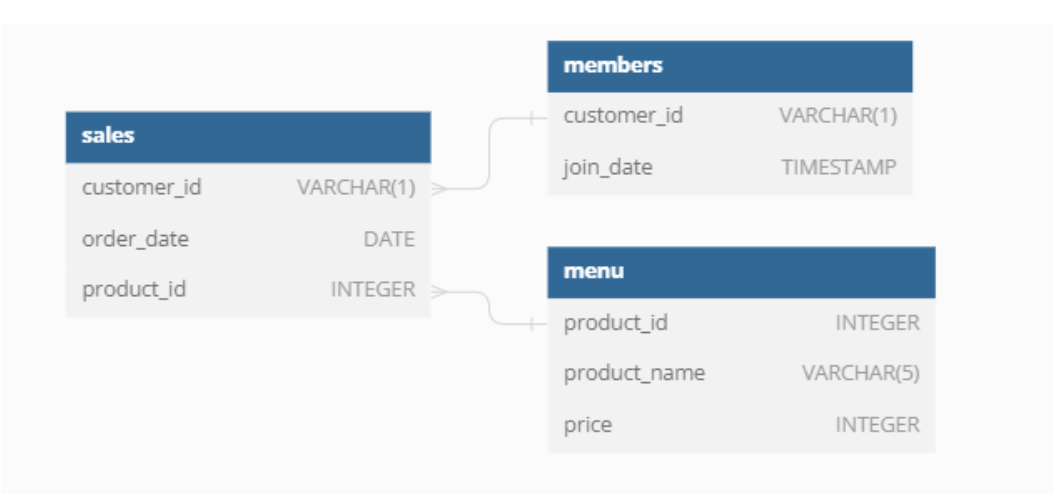

---

## Example Datasets

All datasets exist within the `dannys_diner` database schema - be sure to include this reference within your SQL scripts as you start exploring the data and answering the case study questions.

### Table 1: sales

The `sales` table captures all `customer_id` level purchases with an corresponding `order_date` and `product_id` information for when and what menu items were ordered.

| customer_id | order_date | product_id |
|-------------|------------|------------|
| A           | 2021-01-01 | 1          |
| A           | 2021-01-01 | 2          |
| A           | 2021-01-07 | 2          |
| A           | 2021-01-10 | 3          |
| A           | 2021-01-11 | 3          |
| A           | 2021-01-11 | 3          |
| B           | 2021-01-01 | 2          |
| B           | 2021-01-02 | 2          |
| B           | 2021-01-04 | 1          |
| B           | 2021-01-11 | 1          |
| B           | 2021-01-16 | 3          |
| B           | 2021-02-01 | 3          |
| C           | 2021-01-01 | 3          |
| C           | 2021-01-01 | 3          |
| C           | 2021-01-07 | 3          |

### Table 2: menu

The `menu` table maps the `product_id` to the actual `product_name` and `price` of each menu item.

| product_id | product_name | price |
|------------|--------------|-------|
| 1          | sushi        | 10    |
| 2          | curry        | 15    |
| 3          | ramen        | 12    |

### Table 3: members

The final `members` table captures the `join_date` when a `customer_id` joined the beta version of the Danny’s Diner loyalty program.

| customer_id | join_date  |
|-------------|------------|
| A           | 2021-01-07 |
| B           | 2021-01-09 |

---

## Interactive SQL Session

The Dataset for this case study can be accessed from [here](https://www.db-fiddle.com/f/2rM8RAnq7h5LLDTzZiRWcd/138). I will be using MySQL to solve this case study. In order to solve yourself this case study, simply go to the above link and choose MySQL Dialect (version > 8, if using MySQL version higher than 8 locally), copy & paste the Database schema into MySQL.

Here is the snapshot of it.

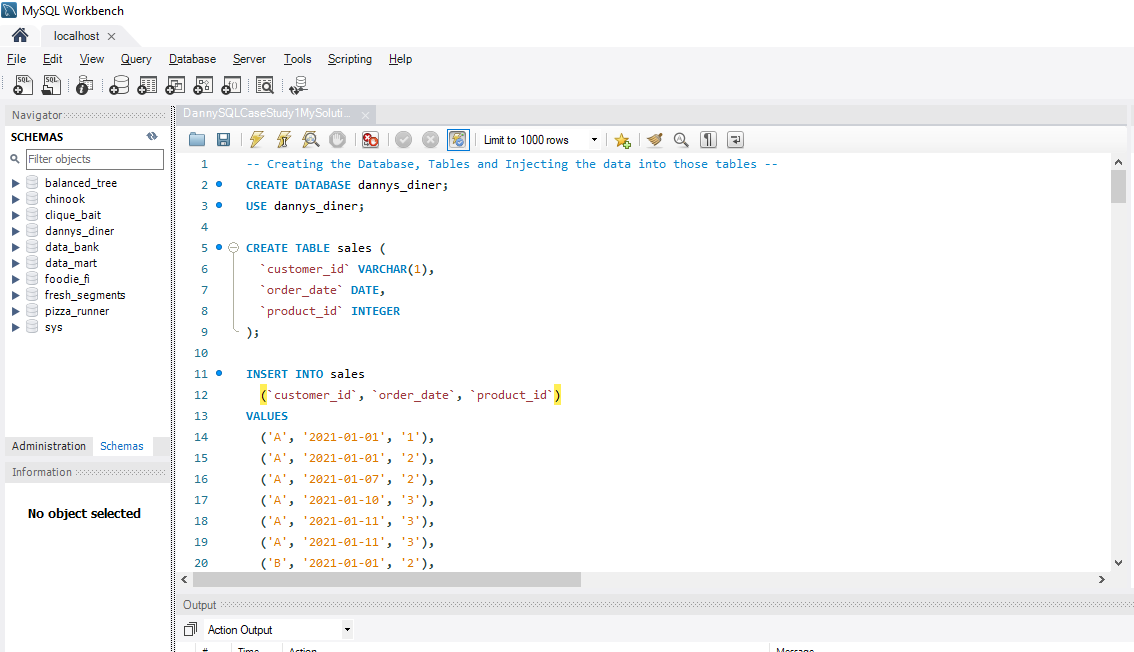

## Case Study Questions

Each of the following case study questions can be answered using a single SQL statement:

- **1. What is the total amount each customer spent at the restaurant?**

**`Explanation`**:
This SQL query selects each customer's ID and the total amount they spent at the restaurant by combining sales and menu data, grouping the results by customer, and ordering them by the total amount spent in ascending order.

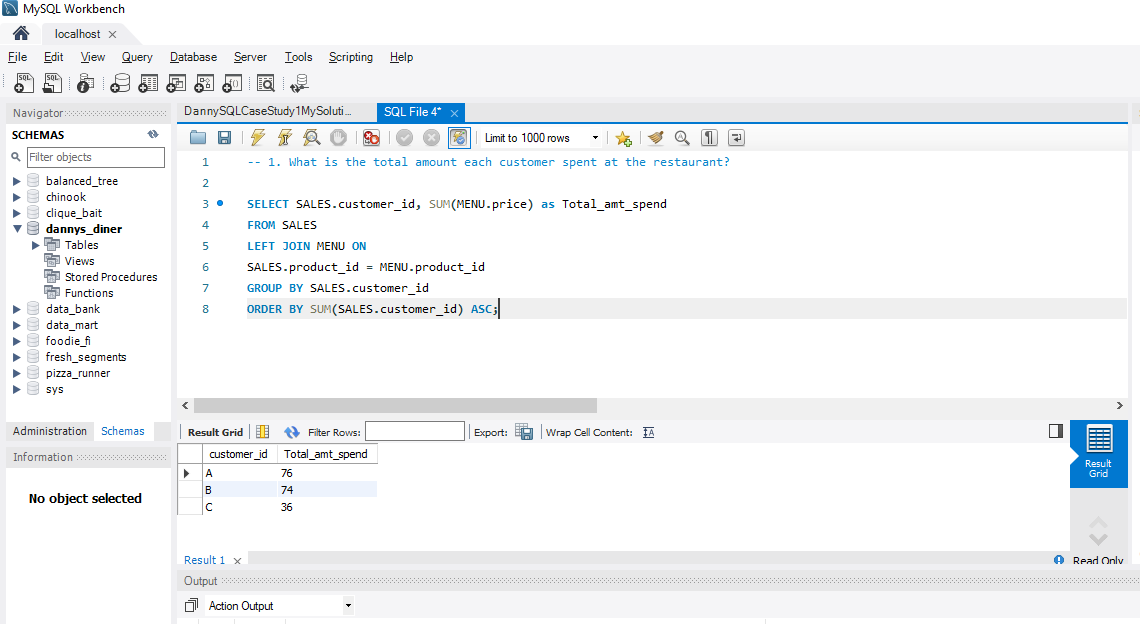

- **2. How many days has each customer visited the restaurant?**

**`Explanation`**:
This SQL query counts the number of distinct days each customer has visited the restaurant by selecting customer IDs, counting unique order dates, grouping the results by customer, and ordering them by customer ID in ascending order.

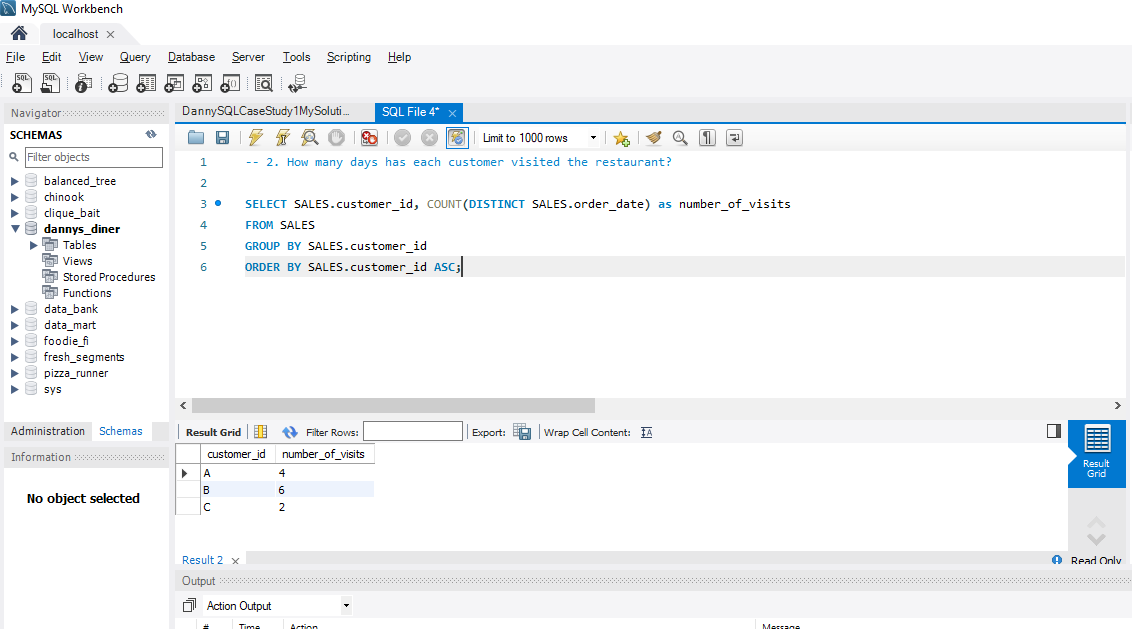

- **3. What was the first item from the menu purchased by each customer?**

**`Explanation`**:

***This SQL query identifies the first item purchased by each customer from the menu. Here's a step-by-step breakdown:***

**1) Creating a Temporary Table 'item_purchased_by_customer':**
    
    WITH item_purchased_by_customer AS (
    SELECT 
        SALES.customer_id as customer_id,
        SALES.order_date as order_date,
        MENU.product_name as product_name,
        DENSE_RANK() OVER (PARTITION BY SALES.customer_id ORDER BY SALES.order_date) as `Dense_Rank`
    FROM SALES
    LEFT JOIN MENU ON SALES.product_id = MENU.product_id)
    
Creates a temporary table 'item_purchased_by_customer' with customer_id, order_date, product_name, and a Dense_Rank based on the order_date for each customer.

**2) Selecting Customer ID and Product Name for the First Purchase:**
    
    SELECT customer_id, product_name
    FROM item_purchased_by_customer
    WHERE `Dense_Rank` = 1
    GROUP BY customer_id, product_name;

Selects customer_id and product_name from the temporary table where the Dense_Rank is 1, indicating the first item purchased by each customer. The results are then grouped by customer_id and product_name for uniqueness.

**`Final Concise Explanation`**:
This SQL query identifies the first item purchased by each customer by creating a temporary table with customer details, calculating a Dense_Rank based on the order date, and then selecting the records where Dense_Rank is 1. The final result is grouped by customer_id and product_name for uniqueness.
    
The following is the SQL query for the question:

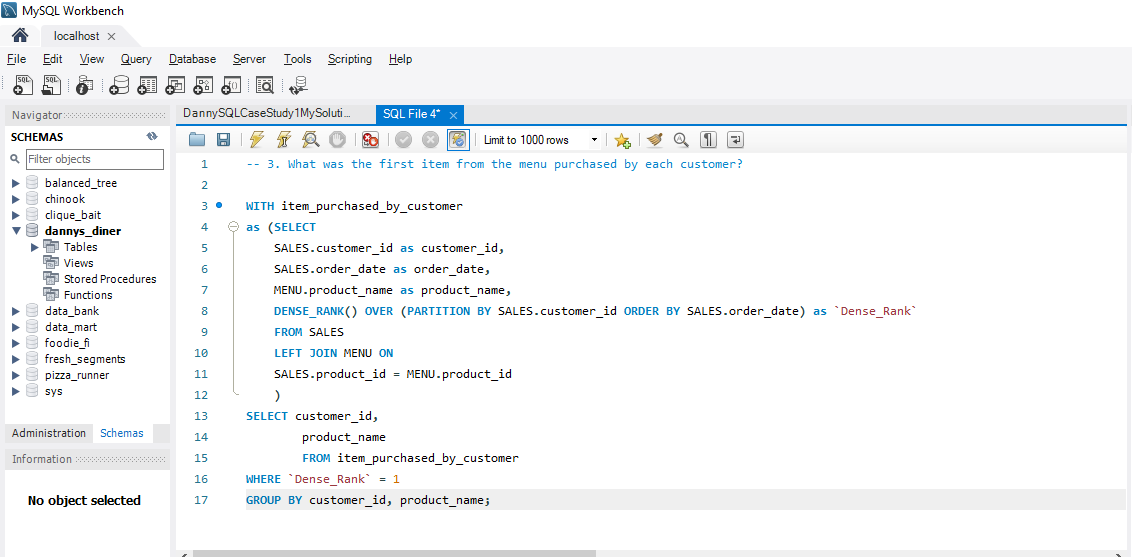

The following is the output of the above SQL query:

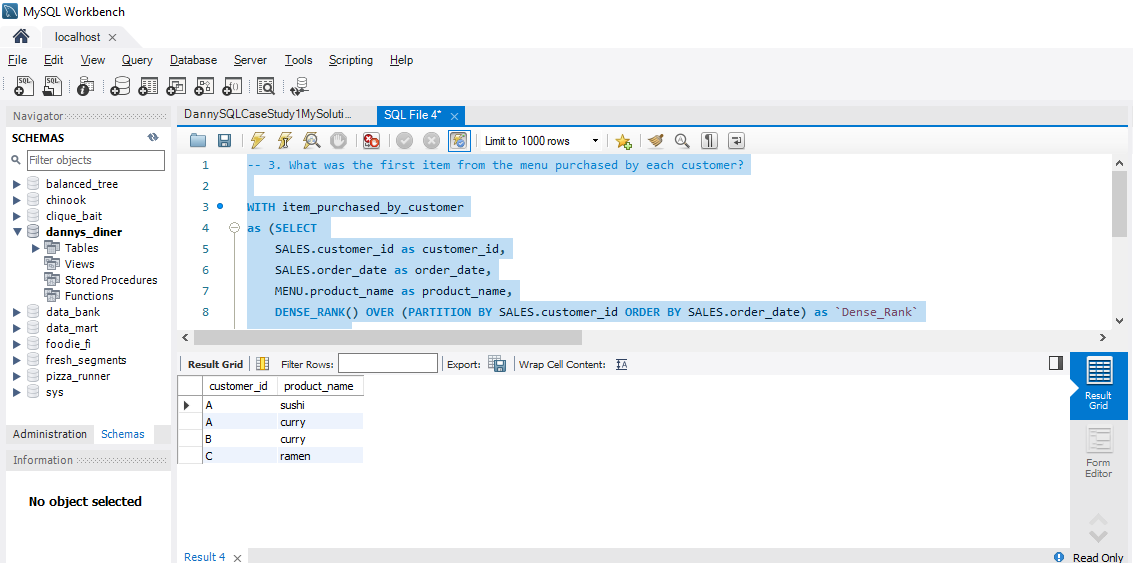

- **4. What is the most purchased item on the menu and how many times was it purchased by all customers?**

**`Explanation`**:
This SQL query identifies the most purchased item on the menu by counting the occurrences of each product in the SALES table, grouping the results by product_name, and selecting the top result based on the highest purchase count.

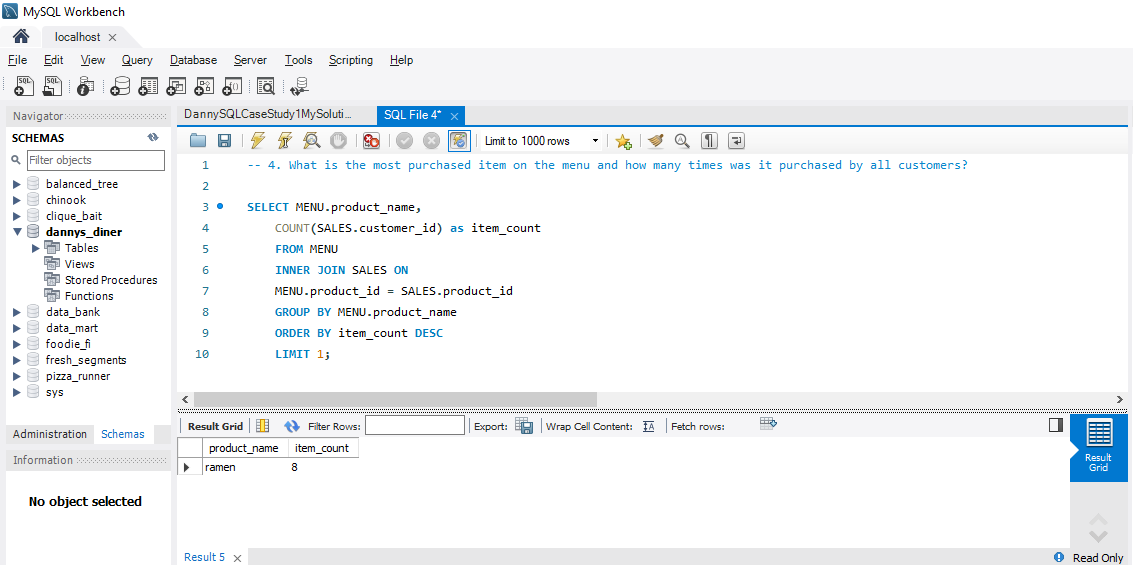

- **5. Which item was the most popular for each customer?**

**`Explanation`**:

***This SQL query aims to determine the most popular item for each customer. Here's a step-by-step breakdown***:

**1) Creating a Temporary Table 'most_popular':**
    
    WITH most_popular AS (
    SELECT SALES.customer_id,
        MENU.product_name,
        COUNT(MENU.product_name) AS order_cnt,
        DENSE_RANK() OVER (PARTITION BY SALES.customer_id ORDER BY COUNT(SALES.customer_id) DESC) as `Dense_Rank`
    FROM SALES
    JOIN MENU ON MENU.product_id = SALES.product_id
    GROUP BY SALES.customer_id, MENU.product_name)
    
Creates a temporary table 'most_popular' with customer_id, product_name, the count of product_name occurrences (order_cnt), and a Dense_Rank based on the order count for each customer.

**2) Selecting Customer ID, Product Name, and Order Count:**
    
    SELECT customer_id, product_name, order_cnt
    FROM most_popular
    WHERE `Dense_Rank` = 1;

Selects customer_id, product_name, and order_cnt from the temporary table 'most_popular' where the Dense_Rank is 1, indicating the most popular item for each customer.

**`Final Concise Explanation`**:
This SQL query identifies the most popular item for each customer by creating a temporary table with customer details, counting the occurrences of each product, calculating a Dense_Rank based on the order count, and then selecting the records where Dense_Rank is 1.

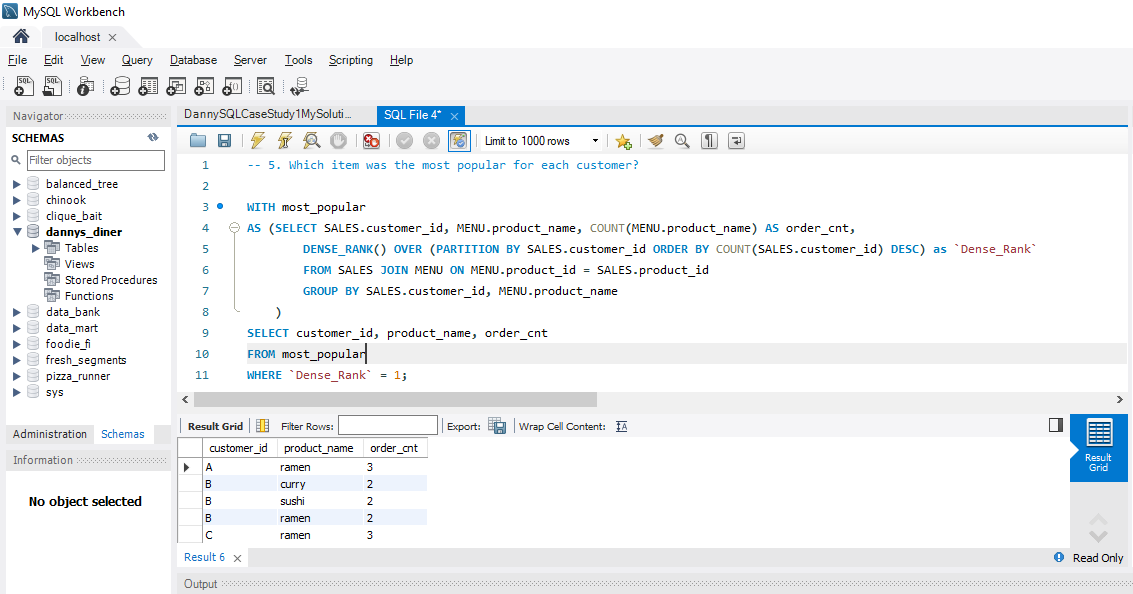

- **6. Which item was purchased first by the customer after they became a member?**

**`Explanation`**:

***This SQL query aims to find the first item purchased by each customer after they became a member. Here's a step-by-step breakdown:***:

**1) Creating a Temporary Table 'first_item_purchased'::**
    
    WITH first_item_purchased AS (
    SELECT 
        MEMBERS.customer_id AS customer_id,
        SALES.product_id AS product_id,
        DENSE_RANK() OVER (PARTITION BY MEMBERS.customer_id ORDER BY SALES.order_date ASC) AS DRank
    FROM MEMBERS
    JOIN SALES ON SALES.customer_id = MEMBERS.customer_id AND SALES.order_date > MEMBERS.join_date)
    
Creates a temporary table 'first_item_purchased' with customer_id, product_id, and a Dense_Rank based on the order date for each customer, considering only sales that occurred after the customer joined as a member.

**2) Selecting Customer ID and Product Name:**
    
    SELECT first_item_purchased.customer_id AS customer_id, MENU.product_name 
    FROM first_item_purchased
    JOIN MENU ON first_item_purchased.product_id = MENU.product_id
    WHERE Drank = 1
    ORDER BY customer_id ASC;

Selects customer_id and product_name from the temporary table 'first_item_purchased' where the Dense_Rank is 1, indicating the first item purchased after becoming a member. The results are then joined with the MENU table to get the product names and ordered by customer_id.

**`Final Concise Explanation`**:
This SQL query identifies the first item purchased by each customer after they became a member by creating a temporary table with customer details, calculating a Dense_Rank based on the order date, and selecting the records where Dense_Rank is 1. The results include customer_id and corresponding product_name, ordered by customer_id.

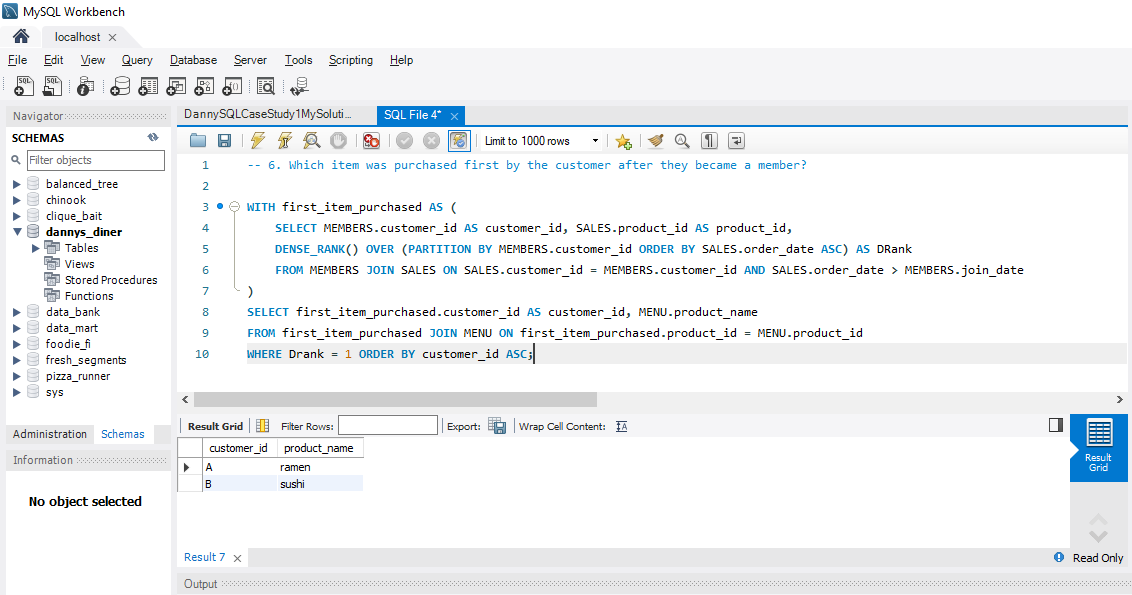

- **7. Which item was purchased just before the customer became a member?**

**`Explanation`**:

***This SQL query aims to identify the item purchased just before each customer became a member. Here's a step-by-step breakdown:***:

**1) Creating a Temporary Table 'first_item_purchased':**
    
    WITH first_item_purchased AS (
    SELECT 
        MEMBERS.customer_id AS customer_id,
        SALES.product_id AS product_id,
        DENSE_RANK() OVER (PARTITION BY MEMBERS.customer_id ORDER BY SALES.order_date DESC) AS DRank
    FROM MEMBERS
    JOIN SALES ON SALES.customer_id = MEMBERS.customer_id AND SALES.order_date < MEMBERS.join_date)

Creates a temporary table 'first_item_purchased' with customer_id, product_id, and a Dense_Rank based on the order date for each customer just before they became a member.

**2) Selecting Customer ID and Product Name:**
    
    SELECT first_item_purchased.customer_id AS customer_id, MENU.product_name 
    FROM first_item_purchased
    JOIN MENU ON first_item_purchased.product_id = MENU.product_id
    WHERE Drank = 1
    ORDER BY customer_id ASC;

Selects customer_id and product_name from the temporary table 'first_item_purchased' where the Dense_Rank is 1, indicating the item purchased just before becoming a member. It then joins with the MENU table to retrieve the product names.

**`Final Concise Explanation`**:
This SQL query identifies the item purchased just before each customer became a member by creating a temporary table with customer details, calculating a Dense_Rank based on the order date (in descending order), and then selecting the records where Dense_Rank is 1. It then joins with the MENU table to retrieve the product names.

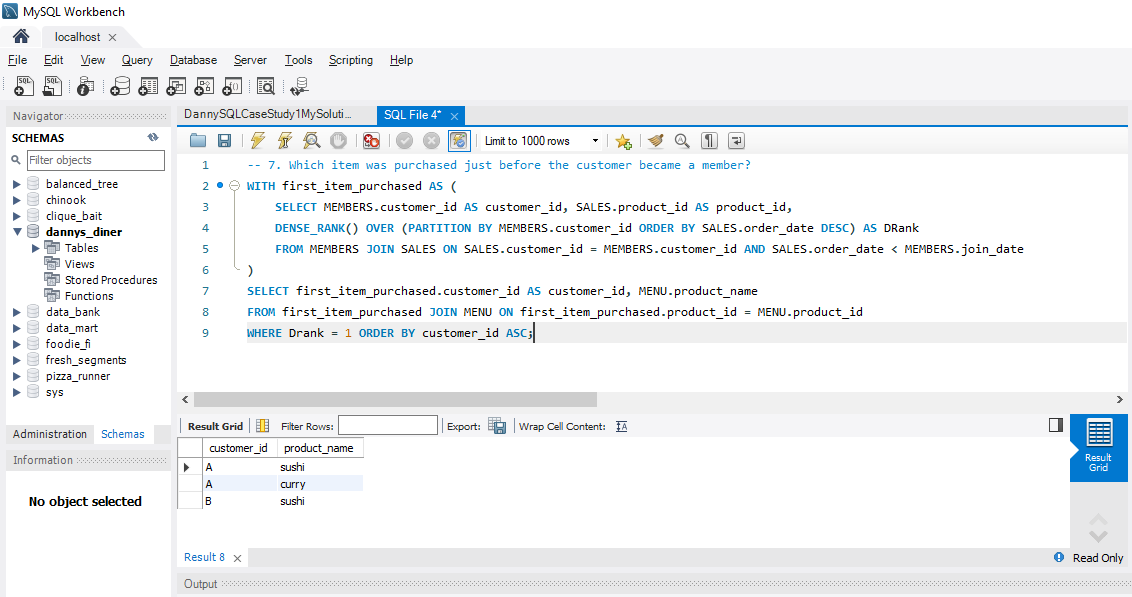

- **8. What is the total items and amount spent for each member before they became a member?**

**`Explanation`**:
This SQL query selects the customer_id, counts total_items_purchased, and calculates the amount_spent by joining SALES, MEMBERS, and MENU tables, filtering based on the join_date, grouping by customer_id, and ordering the results by customer_id.

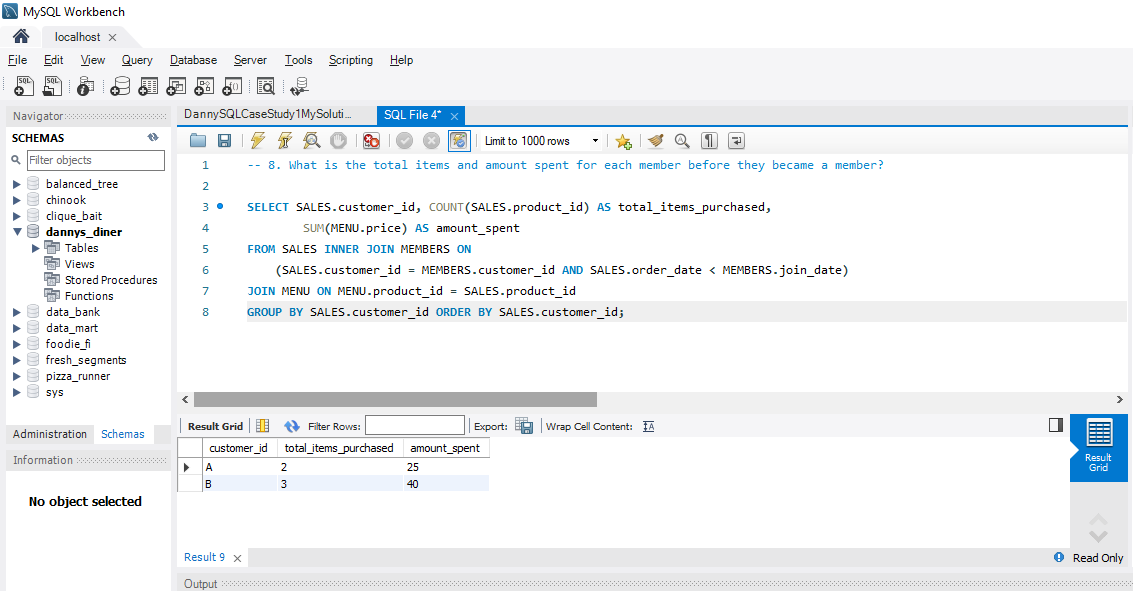

- **9. If each \$1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?**

**`Explanation`**:

***This SQL query calculates the total points each customer would have based on their purchases, considering a $1 spent as 10 points and applying a 2x points multiplier for sushi. Here's a step-by-step breakdown:***

**1) Creating a Temporary Table 'cte' with Points Calculation:**
    
    WITH cte AS (
    SELECT 
        MENU.product_id,
        (CASE 
            WHEN MENU.product_name = 'sushi' THEN 20 * MENU.price
            ELSE 10 * MENU.price 
         END) AS Points
    FROM MENU)

Creates a temporary table 'cte' with product_id and calculated Points based on the price, applying a 2x points multiplier for sushi.

**2) Selecting Customer ID and Calculating Total Points:**
    
    SELECT first_item_purchased.customer_id AS customer_id, MENU.product_name 
    FROM first_item_purchased
    JOIN MENU ON first_item_purchased.product_id = MENU.product_id
    WHERE Drank = 1
    ORDER BY customer_id ASC;

Selects the customer_id and calculates the Total_Points by summing the points from the temporary table 'cte' for each customer. The results are then grouped by customer_id and ordered by customer_id.

**`Final Concise Explanation`**:
This SQL query calculates the total points each customer would have based on their purchases, considering a $1 spent as 10 points and applying a 2x points multiplier for sushi. It uses a temporary table for point calculations and then joins with the SALES table to sum the points for each customer. The results are grouped by customer_id and ordered by customer_id.

The following is the SQL query for the question:

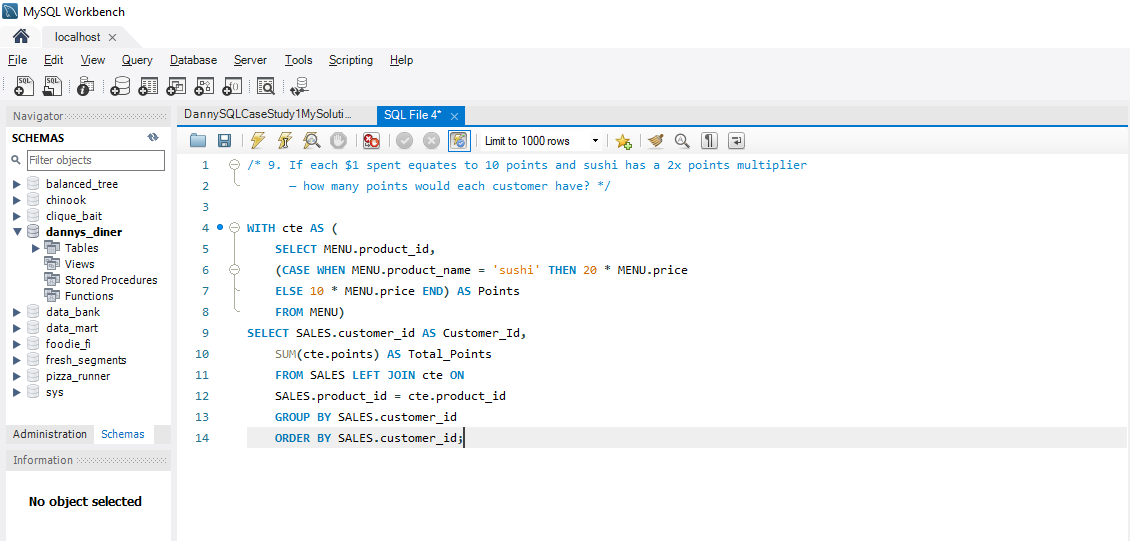

The following is the output of the above SQL query:

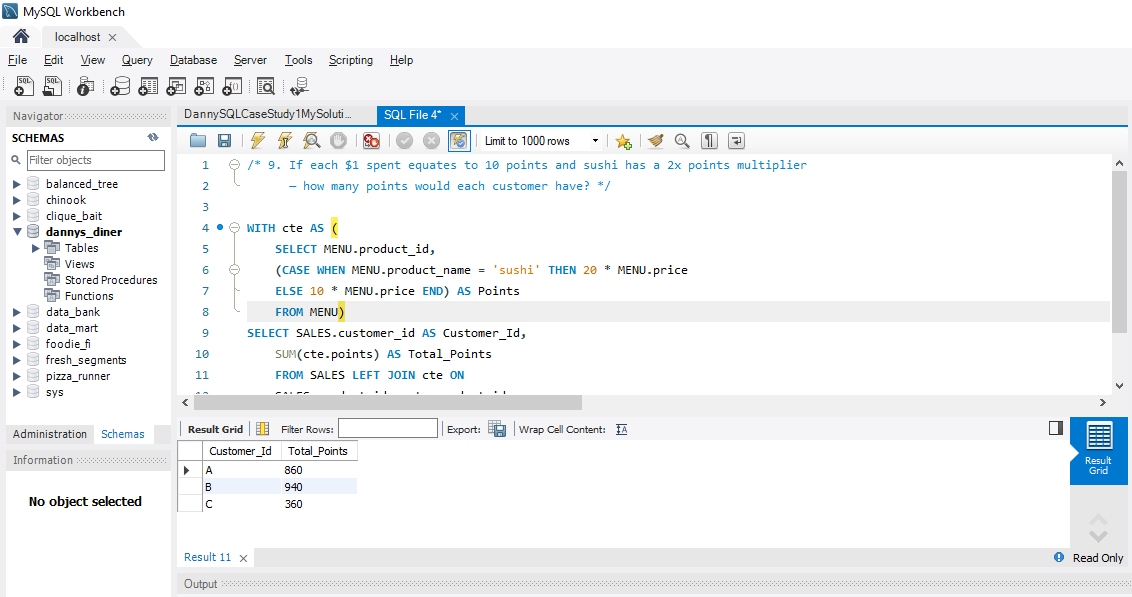

- **10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?**

**`Explanation`**:

***This SQL query addresses the question of determining the total points earned by customers A and B at the end of January, with a special consideration for the first week after a customer joins the program. The points calculation involves different multipliers based on conditions related to the purchase date and product type. Here's a step-by-step breakdown:***

**1) Creating a Common Table Expression (CTE) with Relevant Dates:**
    
    WITH dates_cte AS (
    SELECT 
        customer_id, 
        join_date,
        DATE_ADD(join_date, INTERVAL 6 DAY) AS valid_date,
        LAST_DAY('2021-01-01') AS month_end_date
    FROM members)

Creates a CTE named dates_cte with customer_id, join_date, valid_date (one week after join_date), and the last day of January 2021 as month_end_date.

**2) Selecting Customer ID and Calculating Total Points:**
    
    SELECT 
    DC.customer_id,
    SUM(
        CASE 
            WHEN S.order_date BETWEEN DC.join_date AND DC.valid_date THEN M.price * 20
            WHEN M.product_name = 'sushi' THEN M.price * 20
            ELSE M.price * 10 
        END
    ) AS total_points
    FROM dates_cte AS DC
    JOIN sales AS S ON DC.customer_id = S.customer_id
    JOIN menu AS M ON M.product_id = S.product_id
    WHERE S.order_date <= DC.month_end_date
    GROUP BY DC.customer_id;

Selects the customer_id and calculates the Total_Points by summing the points from the temporary table 'cte' for each customer. The results are then grouped by customer_id and ordered by customer_id.

**`Final Concise Explanation`**:
This SQL query calculates the total points for customers A and B at the end of January, considering a special points multiplier for the first week after joining the program. Points are calculated based on purchase conditions such as order_date range and product type. The results provide the total_points for each customer, grouped by customer_id.

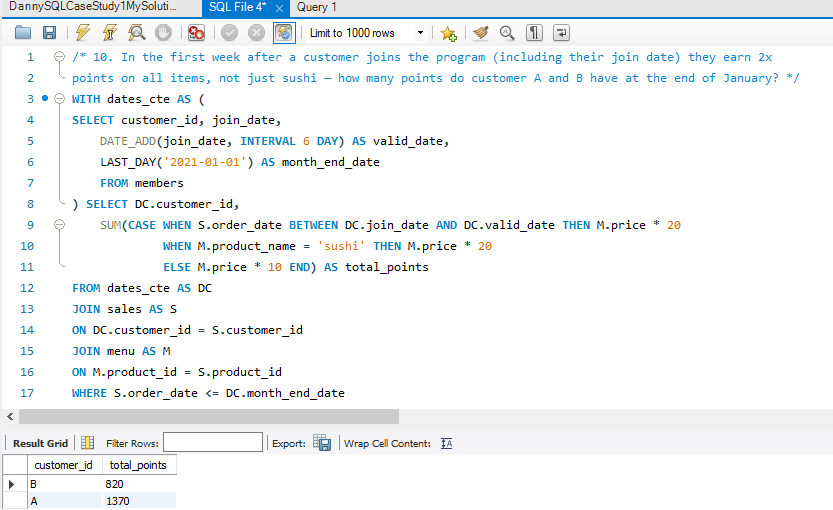

## Bonus Questions
### Join All The Things

The following questions are related creating basic data tables that Danny and his team can use to quickly derive insights without needing to join the underlying tables using SQL.

Recreate the following table output using the available data:

| customer_id | order_date | product_name | price | member |
|-------------|------------|--------------|-------|--------|
| A           | 2021-01-01 | curry        | 15    | N      |
| A           | 2021-01-01 | sushi        | 10    | N      |
| A           | 2021-01-07 | curry        | 15    | Y      |
| A           | 2021-01-10 | ramen        | 12    | Y      |
| A           | 2021-01-11 | ramen        | 12    | Y      |
| A           | 2021-01-11 | ramen        | 12    | Y      |
| B           | 2021-01-01 | curry        | 15    | N      |
| B           | 2021-01-02 | curry        | 15    | N      |
| B           | 2021-01-04 | sushi        | 10    | N      |
| B           | 2021-01-11 | sushi        | 10    | Y      |
| B           | 2021-01-16 | ramen        | 12    | Y      |
| B           | 2021-02-01 | ramen        | 12    | Y      |
| C           | 2021-01-01 | ramen        | 12    | N      |
| C           | 2021-01-01 | ramen        | 12    | N      |
| C           | 2021-01-07 | ramen        | 12    | N      |

The following is the SQL query for the question:

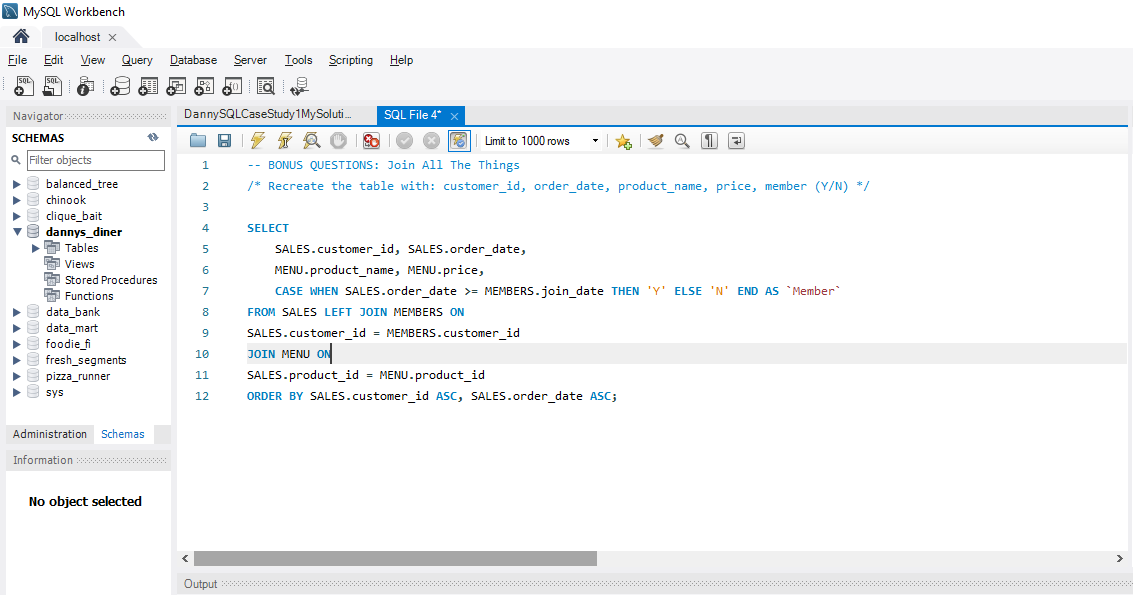

The following is the output of the above executed SQL query:

**`Explanation`**:
This SQL query recreates a table with columns customer_id, order_date, product_name, price, and member (Y/N). It combines information from the SALES, MEMBERS, and MENU tables, calculating the membership status based on the order_date and join_date. The results are ordered by customer_id and order_date for clarity.

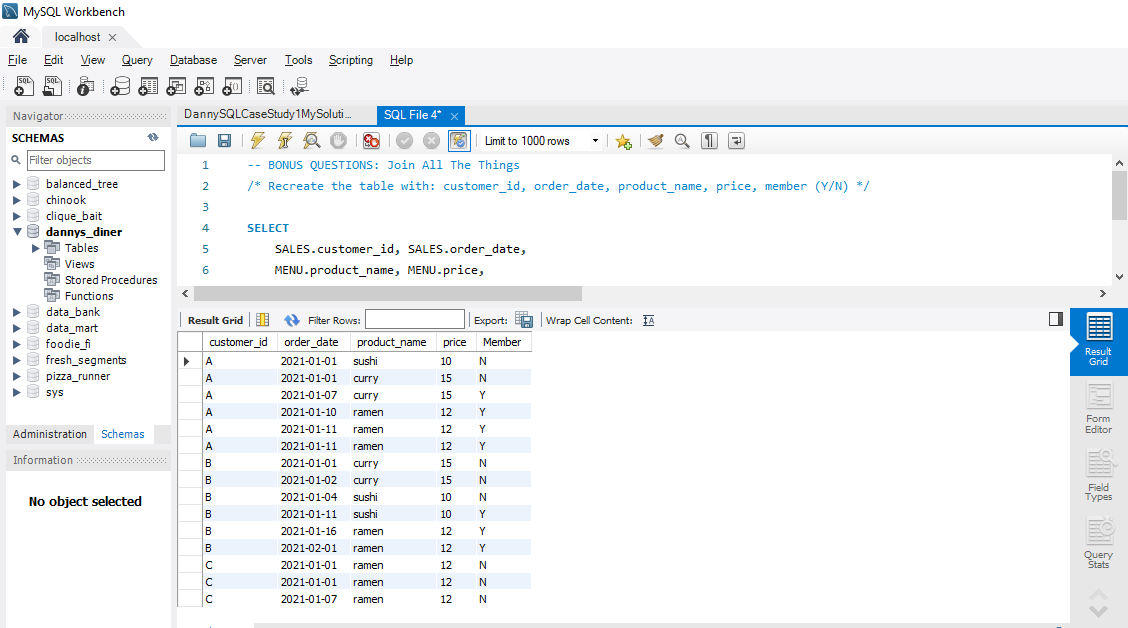

### Rank All The Things

Danny also requires further information about the `ranking` of customer products, but he purposely does not need the ranking for non-member purchases so he expects null `ranking` values for the records when customers are not yet part of the loyalty program.

| customer_id | order_date | product_name | price | member | ranking |
|-------------|------------|--------------|-------|--------|---------|
| A           | 2021-01-01 | curry        | 15    | N      | null    |
| A           | 2021-01-01 | sushi        | 10    | N      | null    |
| A           | 2021-01-07 | curry        | 15    | Y      | 1       |
| A           | 2021-01-10 | ramen        | 12    | Y      | 2       |
| A           | 2021-01-11 | ramen        | 12    | Y      | 3       |
| A           | 2021-01-11 | ramen        | 12    | Y      | 3       |
| B           | 2021-01-01 | curry        | 15    | N      | null    |
| B           | 2021-01-02 | curry        | 15    | N      | null    |
| B           | 2021-01-04 | sushi        | 10    | N      | null    |
| B           | 2021-01-11 | sushi        | 10    | Y      | 1       |
| B           | 2021-01-16 | ramen        | 12    | Y      | 2       |
| B           | 2021-02-01 | ramen        | 12    | Y      | 3       |
| C           | 2021-01-01 | ramen        | 12    | N      | null    |
| C           | 2021-01-01 | ramen        | 12    | N      | null    |
| C           | 2021-01-07 | ramen        | 12    | N      | null    |

The following is the SQL query to generate the above output:

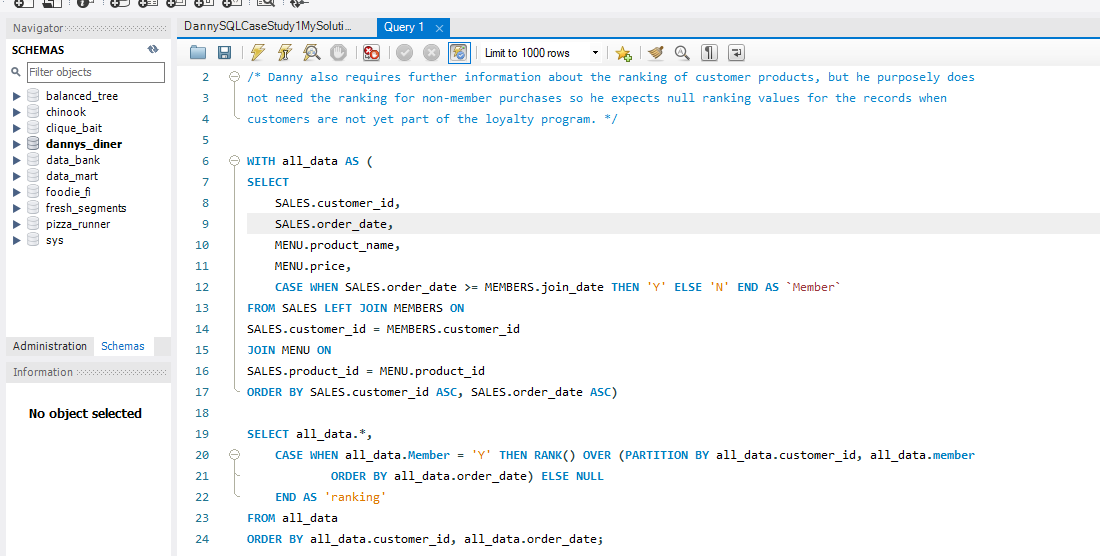

Confirming the output from the above query, if it matches with the expected output.

**`Explanation`**:

***This SQL query ranks customer products, providing null ranking values for records when customers are not yet part of the loyalty program. Here's a step-by-step breakdown:***

**1) Creating a Temporary Table 'all_data' with Additional Information:**
    
    WITH all_data AS (
    SELECT 
        SALES.customer_id, SALES.order_date, MENU.product_name, MENU.price,
        CASE WHEN SALES.order_date >= MEMBERS.join_date THEN 'Y' ELSE 'N' END AS `Member`
    FROM SALES 
    LEFT JOIN MENU ON SALES.product_id = MENU.product_id
    JOIN MEMBERS ON SALES.customer_id = MEMBERS.customer_id)

Creates a temporary table 'all_data' with customer_id, order_date, product_name, price, and the membership status ('Y' for joined members, 'N' for non-members) using a CASE statement based on the order_date and join_date.

**2) Ranking Products for Members:**
    
    SELECT all_data.*,
    CASE WHEN all_data.Member = 'Y' 
         THEN RANK() OVER (PARTITION BY all_data.customer_id, all_data.member ORDER BY all_data.order_date) 
         ELSE NULL 
    END AS 'ranking' 
    FROM all_data;

Selects all columns from the temporary table 'all_data' and calculates the ranking using the RANK() function over the order_date for each customer. If the customer is not a member ('Y'), it assigns null to the ranking.

**`Final Concise Explanation`**:
This SQL query ranks customer products, providing null ranking values for records when customers are not yet part of the loyalty program. It uses a temporary table to combine information from the SALES, MENU, and MEMBERS tables and applies the RANK() function over the order_date for members, assigning null to the ranking for non-members.

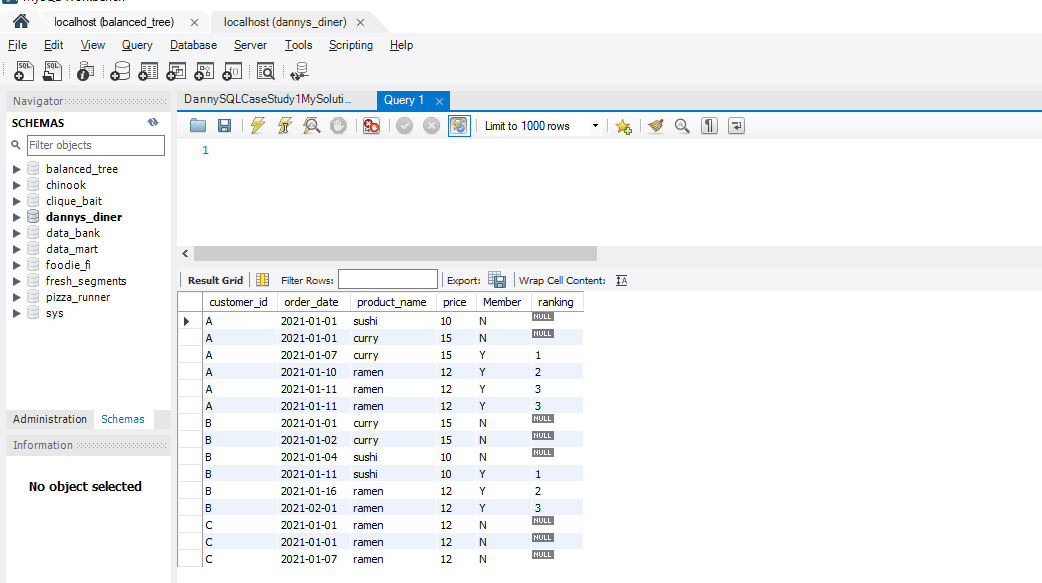